In [224]:
import numpy as np
import pandas as pd
d=pd.read_csv('ckd.csv')


In [225]:
nullpercent=(d.isna().sum()/len(d))*100
nullpercent

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [226]:
d.drop(['rbc', 'sod','pot','wc','rc'], axis = 1,inplace=True)
d

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,0.8,11.3,38,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,31,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,0.5,15.7,47,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,1.2,16.5,54,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,0.6,15.8,49,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,1.0,14.2,51,no,no,no,good,no,no,notckd


In [227]:
nullpercent=(d.isna().sum()/len(d))*100
nullpercent

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
hemo              13.00
pcv               17.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [228]:
from sklearn.feature_selection import GenericUnivariateSelect,chi2
from sklearn.feature_selection import SelectKBest
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
bestfeatures = SelectKBest(score_func=chi2, k=20)
transformer
bestfeatures

SelectKBest(k=20, score_func=<function chi2 at 0x7f48765e6290>)

In [229]:
d[['htn','dm','cad','pe','ane']] = d[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
d[['pc']] = d[['pc']].replace(to_replace={'abnormal':1,'normal':0})
d[['pcc','ba']] = d[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
d[['appet']] = d[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
d['classification'] = d['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
d.rename(columns={'classification':'class'},inplace=True)

In [230]:
d['pe'] = d['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
d['appet'] = d['appet'].replace(to_replace='no',value=0)
d['cad'] = d['cad'].replace(to_replace='\tno',value=0)
d['dm'] = d['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
d.drop('id',axis=1,inplace=True)

In [231]:
d['al'].fillna(d.al.mean(),inplace= True)
d['sg'].fillna(d.sg.mean(),inplace= True)
d['hemo'].fillna(d.hemo.mean(),inplace= True)
d['sc'].fillna(d.sc.mean(),inplace= True)
d['bu'].fillna(d.bu.mean(),inplace= True)
d['age'].fillna(d.age.mean(),inplace= True)
d['su'].fillna(d.su.mean(),inplace= True)
d['bp'].fillna(d.bp.mean(),inplace= True)
d['bgr'].fillna(d.bgr.mean(),inplace= True)
d['pcv'].ffill(inplace = True)
d['pcv'] = d['pcv'].replace(to_replace={'\t?':d['pcv'].ffill(inplace=True),'\t43':d['pcv'].ffill(inplace=True)})


In [232]:
d.isna().sum()

age       0
bp        0
sg        0
al        0
su        0
pc       65
pcc       4
ba        4
bgr       0
bu        0
sc        0
hemo      0
pcv       4
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
class     0
dtype: int64

In [233]:
d.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
hemo     float64
pcv       object
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

In [234]:
d['pcv'].unique()
d = d.astype({"pcv":'float'}) 
d.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
hemo     float64
pcv      float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

In [235]:
d['pc'].fillna(d.pc.mean(),inplace= True)
d['pcc'].fillna(d.pcc.mean(),inplace= True)
d['ba'].fillna(d.ba.mean(),inplace= True)
d['pcv'].fillna(d.pcv.median(),inplace= True)
d['htn'].fillna(d.htn.mean(),inplace= True)
d['dm'].fillna(d.dm.mean(),inplace= True)
d['cad'].fillna(d.cad.mean(),inplace= True)
d['appet'].fillna(d.appet.mean(),inplace= True)
d['pe'].fillna(d.pe.mean(),inplace= True)
d['ane'].fillna(d.ane.mean(),inplace= True)
d.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [236]:
x = d.iloc[:,:-1]  #independent columns
y = d.iloc[:,-1] #dependent or target column
print(x)
print(y)

      age    bp     sg   al   su   pc  ...  htn   dm  cad  appet   pe  ane
0    48.0  80.0  1.020  1.0  0.0  0.0  ...  1.0  1.0  0.0    1.0  0.0  0.0
1     7.0  50.0  1.020  4.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
2    62.0  80.0  1.010  2.0  3.0  0.0  ...  0.0  1.0  0.0    0.0  0.0  1.0
3    48.0  70.0  1.005  4.0  0.0  1.0  ...  1.0  0.0  0.0    0.0  1.0  1.0
4    51.0  80.0  1.010  2.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
..    ...   ...    ...  ...  ...  ...  ...  ...  ...  ...    ...  ...  ...
395  55.0  80.0  1.020  0.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
396  42.0  70.0  1.025  0.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
397  12.0  80.0  1.020  0.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
398  17.0  60.0  1.025  0.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0
399  58.0  80.0  1.025  0.0  0.0  0.0  ...  0.0  0.0  0.0    1.0  0.0  0.0

[400 rows x 19 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.

In [237]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.feature_selection import SelectKBest
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=19)
bestfeatures = SelectKBest(score_func=chi2, k=19)
X_new = transformer.fit_transform(x, y)
X_new.shape
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(19,'Score'))  #print strength of each feature to consider best features 

    Specs        Score
8     bgr  2428.303583
9      bu  2336.007159
12    pcv   476.823375
10     sc   354.405935
3      al   228.067797
11   hemo   125.101692
0     age   113.462452
4      su   100.951947
13    htn    86.295156
14     dm    80.424737
1      bp    80.023863
5      pc    48.110042
17     pe    45.106794
18    ane    35.610627
6     pcc    24.115071
15    cad    19.959424
7      ba    12.631704
16  appet    12.589162
2      sg     0.005524


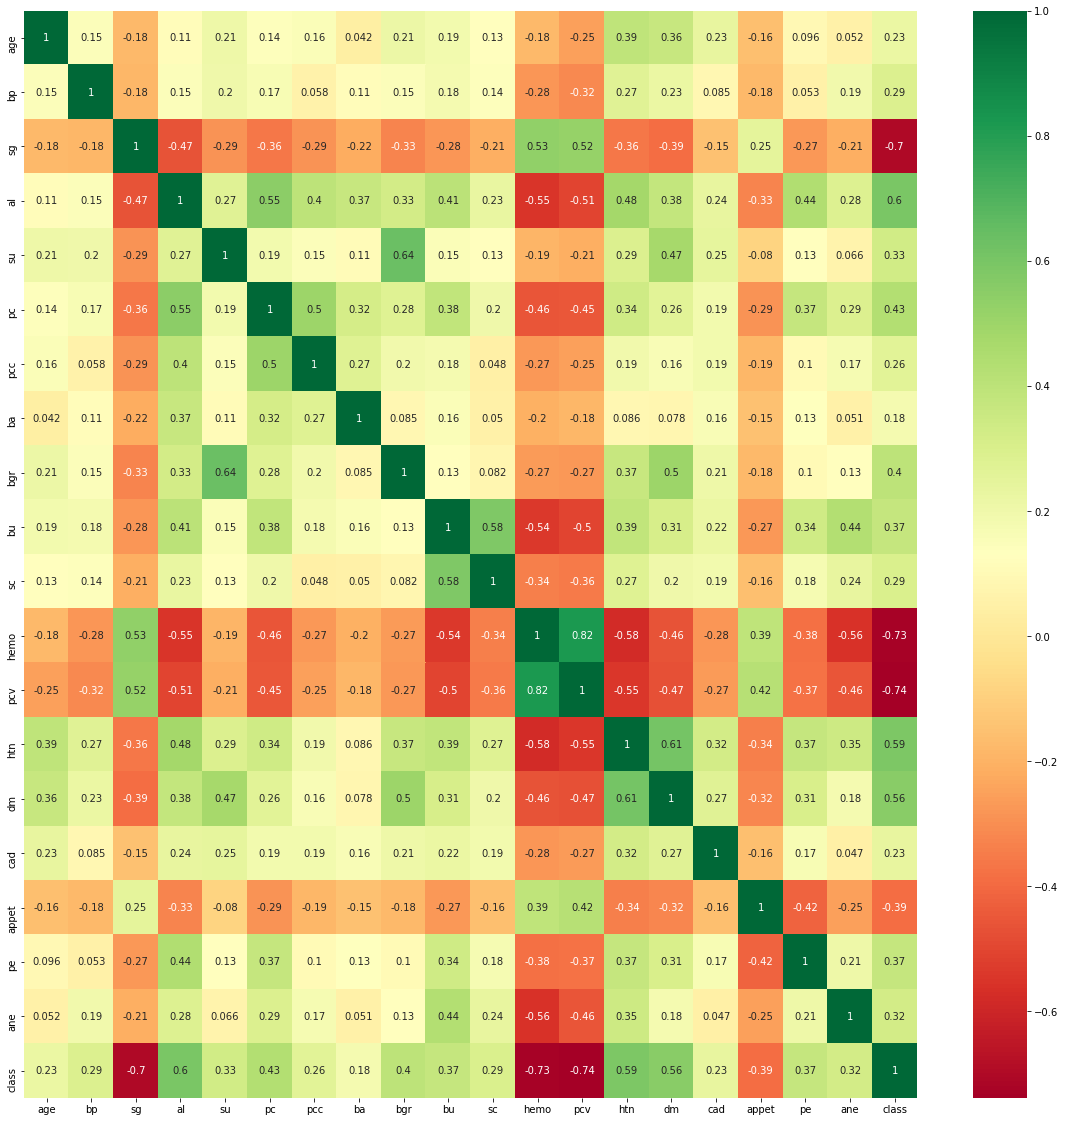

In [238]:


import matplotlib.pyplot as plt
import seaborn as sns

corrmat = d.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(d[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.00538256 0.01368763 0.16545564 0.11807892 0.01612257 0.0320818
 0.00444709 0.00167256 0.02626339 0.00826485 0.01748406 0.13951574
 0.1239491  0.12763272 0.10925824 0.00245018 0.04381616 0.02731361
 0.01712317]


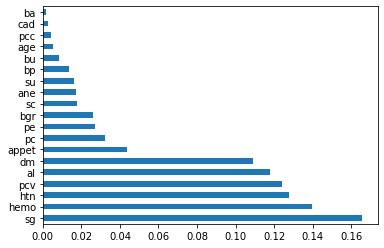

In [239]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [240]:
#sg(specific gravity),hemo(haemoglobin),htn( hypertension),dm(diabetes mellitus),pcv (packed cell volume),al(albumin),sc(serum creatinine),bgr(blood glucose random )
cols_to_retain=['sg','hemo','htn','dm','pcv','al','sc','bgr','class']
for col in d.columns:
    if col not in cols_to_retain :
        del d[col]
  
d.shape
d.columns
d.describe()
print(d.shape)

(400, 9)


In [241]:
x = d.iloc[:,:-1]  #independent columns
y = d.iloc[:,-1]    #target column
print(x)
y

        sg   al         bgr   sc  hemo   pcv  htn   dm
0    1.020  1.0  121.000000  1.2  15.4  44.0  1.0  1.0
1    1.020  4.0  148.036517  0.8  11.3  38.0  0.0  0.0
2    1.010  2.0  423.000000  1.8   9.6  31.0  0.0  1.0
3    1.005  4.0  117.000000  3.8  11.2  32.0  1.0  0.0
4    1.010  2.0  106.000000  1.4  11.6  35.0  0.0  0.0
..     ...  ...         ...  ...   ...   ...  ...  ...
395  1.020  0.0  140.000000  0.5  15.7  47.0  0.0  0.0
396  1.025  0.0   75.000000  1.2  16.5  54.0  0.0  0.0
397  1.020  0.0  100.000000  0.6  15.8  49.0  0.0  0.0
398  1.025  0.0  114.000000  1.0  14.2  51.0  0.0  0.0
399  1.025  0.0  131.000000  1.1  15.8  53.0  0.0  0.0

[400 rows x 8 columns]


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

# Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=10)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict (x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [243]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9666666666666667


In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[36  1]
 [ 3 80]]


# k-Nearest Neighbors(KNN) regression

In [245]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model with k=3
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting model
knn.fit(x_train,y_train)
#predict
pred = knn.predict(x_test)


In [246]:
from sklearn.metrics import accuracy_score
print("Accuracy:{}".format(accuracy_score(y_test,pred)))

Accuracy:0.95


In [247]:
predictions = knn.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[36,  1],
       [ 5, 78]])

# SVC with a linear kernel

In [248]:
from sklearn.svm import SVC
svcc=SVC(kernel='linear',random_state=10)
svcc.fit(x_train,y_train)
print("score of SVC model with linear kernel is",svcc.score(x_test,y_test))


score of SVC model with linear kernel is 0.9666666666666667


In [249]:
predictions = svcc.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[36,  1],
       [ 3, 80]])

# SVC with RBF kernel

In [250]:
from sklearn.svm import SVC
svccc=SVC(kernel='rbf',random_state=10)
svccc.fit(x_train,y_train)
print("score of SVC model with RBF kernel is",svccc.score(x_test,y_test))

score of SVC model with RBF kernel is 0.9166666666666666


In [251]:
predictions = svccc.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[35,  2],
       [ 8, 75]])

# Gaussian NB

In [252]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
print("score of Gaussian NB is",gnb.score(x_test,y_test))

score of Gaussian NB is 0.9416666666666667


In [253]:
predgnb = gnb.predict(x_test)
cm = metrics.confusion_matrix(y_test, predgnb)
cm

array([[34,  3],
       [ 4, 79]])

# decision tree classifier

In [254]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train, y_train)
print('accuracy of Decision Tree model is : ', accuracy_score(y_test, y_test))

accuracy of Decision Tree model is :  1.0


In [255]:
predictdt = dt.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictdt)
cm

array([[37,  0],
       [ 1, 82]])

# random forest classifier

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_boston
#from sklearn.externals import joblib

rfclass=RandomForestClassifier()
rfclass.fit(x_train,y_train)
print("Score of RandomForestClassifer model is",rfclass.score(x_test,y_test))

#joblib.dump(regressor_rf,'regressor_rf_jb')


Score of RandomForestClassifer model is 1.0


In [261]:
predrfc = rfc.predict(x_test)
print(classification_report(y_test,predrfc))
cm = metrics.confusion_matrix(y_test, predrfc)
cm

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      1.00      1.00        83

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



array([[37,  0],
       [ 0, 83]])

# AdaBoostClassifier

In [258]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

98.33333333333333
[[37  0]
 [ 2 81]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        37
         1.0       1.00      0.98      0.99        83

    accuracy                           0.98       120
   macro avg       0.97      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



# GradientBoostingClassifier

In [259]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier



gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)##---86.99,,81.86
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

100.0
[[37  0]
 [ 0 83]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      1.00      1.00        83

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [260]:
import pickle 
with open('ckdproj.pickle','wb') as f:
    pickle.dump(rfclass,f)
rfc_model=pickle.load(open('ckdproj.pickle','rb'))
rfc_model.predict([[ 1.025 , 0.0,  131.000000 , 1.1,  15.8 , 53.0 , 0.0 , 0.0]])[0]

0.0